# Regressão Linear com balanceamento de dataset
## Predict client's default

In [1]:
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
import statsmodels.api as sm

In [2]:
data = pd.read_csv('CC2.csv')

In [3]:
data.head(3)

,Unnamed: 0,default,student,balance,income
0,1,No,No,729.526495,44361.625074
1,2,No,Yes,817.180407,12106.134700
2,3,No,No,1073.549164,31767.138947


In [4]:
data['default'] = data['default'].replace({'No':0,'Yes':1})
data['student'] = data['student'].replace({'No':0,'Yes':1})

In [5]:
data.shape

(10000, 5)

In [6]:
data.rename(columns={'Unnamed: 0':'id'},inplace = True)
data.set_index('id', inplace = True)

In [7]:
data.isna().sum().sum()

0

data.describe()

### Saldo nulo 
- O grande número de observações com saldo nulo (balance = 0) pode comprometer a análise já que clientes com saldo 0 não entram em default do cartão de crédito, uma vez que já não tinham dívidas para começar
- Além disso, o histograma abaixo mostra como os clientes com altos saldos são aqueles que dão default.

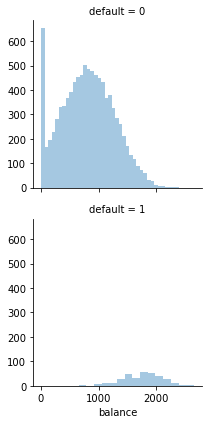

In [57]:
g = sns.FacetGrid(data,row = 'default')
g = g.map(sns.distplot,'balance',kde = False)

In [61]:
data = data[data['balance']>0]
min(data['balance'])

0.0238162970920257

In [60]:
data.shape

(9501, 4)

In [62]:
data.describe()

,default,student,balance,income
count,9501.000000,9501.000000,9501.000000,9501.000000
mean,0.035049,0.302915,879.249432,33316.251726
std,0.183913,0.459543,455.729715,13379.374162
min,0.000000,0.000000,0.023816,771.967729
25%,0.000000,0.000000,539.441909,21097.370307
50%,0.000000,0.000000,854.511279,34316.890148
75%,0.000000,1.000000,1185.096271,43660.391714
max,1.000000,1.000000,2654.322576,73554.233495


## O dataset está desbalanceado

### A grande maioria do dataset é feito de observações de default 'Sim'

In [73]:
(len(data[data['default'] == 1])/len(data), len(data[data['default'] == 0])/len(data))

(0.03504894221660878, 0.9649510577833912)

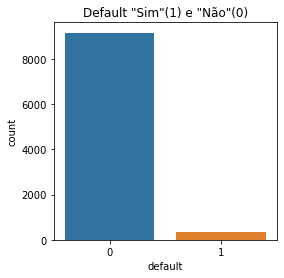

In [63]:
plt.figure(figsize=(4, 4))
sns.countplot(data=data,x ='default').set_title('Default "Sim"(1) e "Não"(0)')
plt.show()

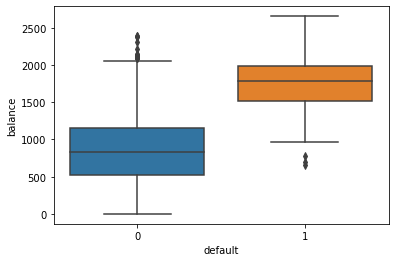

In [64]:
plt.figure(figsize=(6, 4))
sns.boxplot(data = data, x = 'default', y = 'balance')
plt.show()

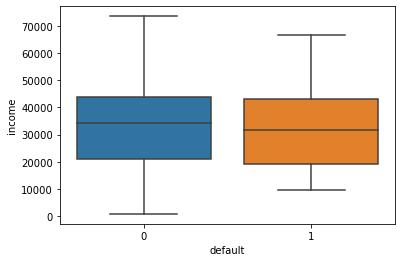

In [65]:
plt.figure(figsize=(6, 4))
sns.boxplot(data = data, x ='default', y ='income')
plt.show()

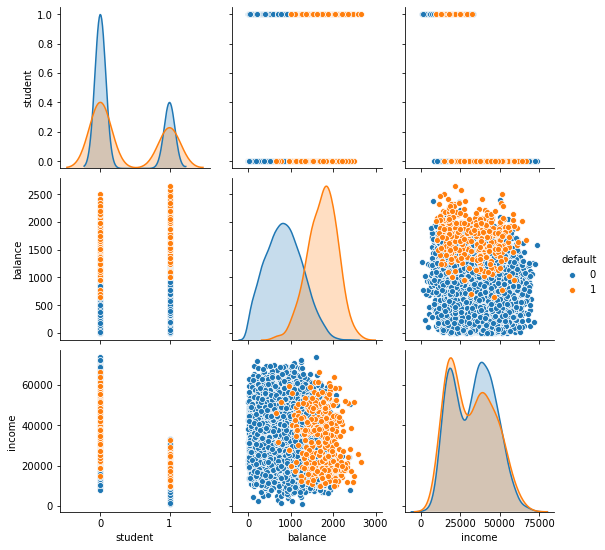

In [76]:
sns.pairplot(data,hue='default')
plt.show()

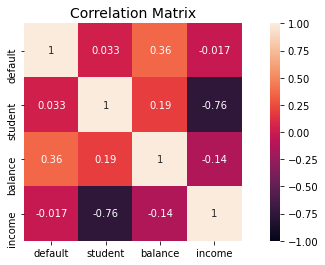

In [77]:
corr = data.corr()
f, alx = plt.subplots(figsize = (10,4))
sns.heatmap(corr, vmax = 1, vmin = -1, square = True, annot = True)
alx.set_title("Correlation Matrix", fontsize=14)
plt.show()

#### Regressão Linear com dataset desbalanceado
- Resolvi não incluir inocome como parte da regressão por que não apresentou correlação suficiente com os dados nem melhorou sua performance

In [78]:
model = sm.OLS.from_formula("default ~ balance + student", data=data)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                default   R-squared:                       0.133
Model:                            OLS   Adj. R-squared:                  0.133
Method:                 Least Squares   F-statistic:                     730.6
Date:                Tue, 29 Sep 2020   Prob (F-statistic):          7.53e-296
Time:                        12:44:48   Log-Likelihood:                 3286.9
No. Observations:                9501   AIC:                            -6568.
Df Residuals:                    9498   BIC:                            -6546.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.0918      0.004    -23.825      0.000      -0.099      -0.084
balance        0.0001   3.93e-06     38.073      0.000       0.000       0.000
student       -0.0151      0.004     -3.882      0.000      -0.023      -0.007
==============================================================================
Omnibus:                     7808.343   Durbin-Watson:                   2.015
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           146547.294
Skew:                           4.044   Prob(JB):                         0.00
Kurtosis:                      20.458   Cond. No.                     2.33e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.33e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [69]:
beta = (result.params)
beta

Intercept   -0.091808
balance      0.000149
student     -0.015116
dtype: float64

In [70]:
yhat = (beta[0] + beta[1] * data['balance'] + beta[2] * data['student']).astype(int)
yhat.sum()

0

## Balanceando o dataset
#### O balancecamento equilibra as proporções tirando observações de Default = 'No'
- As duas classes agora possuem tamanhos iguais com observações aleatórias de Default='No' no dataset

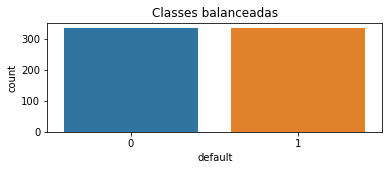

In [79]:
mistura = data.sample(frac=1,random_state=4)
#Default fica num dataset separado
fraude = mistura.loc[mistura['default'] == 1]
#Selecionna n observações aleatoriamente de default = No
nao_fraude = mistura.loc[mistura['default'] == 0].sample(n=333,random_state=123)
# Junta os dois datasets
data2 = pd.concat([fraude, nao_fraude])
#plot novo dataset
plt.figure(figsize=(6, 2))
sns.countplot('default', data=data2)
plt.title('Classes balanceadas')
plt.show()

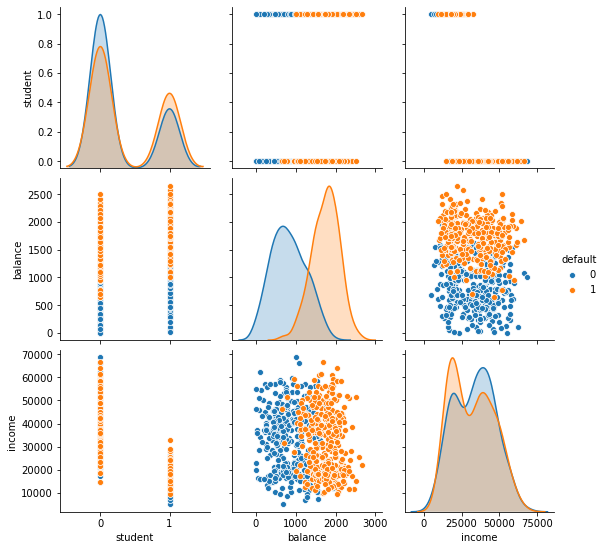

In [80]:
sns.pairplot(data2,hue='default')
plt.show()

### Linear Regression com dataset balanceado
- Agora o dataset possui um numero menor e equilibrado de observações

In [81]:
normalized_df.shape

(833, 4)

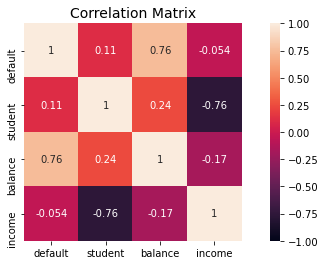

In [82]:
corr = normalized_df.corr()
f, alx = plt.subplots(figsize = (10,4))
sns.heatmap(corr, vmax = 1, vmin = -1, square = True, annot = True)
alx.set_title("Correlation Matrix", fontsize=14)
plt.show()

### Agora o dataset possui um r^2 bem maior
- Entretanto, o modelo tem multicolinearidade entre as variáveis

In [83]:
model = sm.OLS.from_formula("default ~ student + balance", data = data2)
result = model.fit()
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                default   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     480.9
Date:                Tue, 29 Sep 2020   Prob (F-statistic):          9.00e-130
Time:                        12:45:31   Log-Likelihood:                -184.89
No. Observations:                 666   AIC:                             375.8
Df Residuals:                     663   BIC:                             389.3
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -0.3182      0.030    -10.755      0.000      -0.376      -0.260
student       -0.0686      0.027     -2.536      0.011      -0.122      -0.015
balance        0.0007   2.13e-05     30.702      0.000       0.001       0.001
==============================================================================
Omnibus:                        8.594   Durbin-Watson:                   1.266
Prob(Omnibus):                  0.014   Jarque-Bera (JB):                8.719
Skew:                          -0.264   Prob(JB):                       0.0128
Kurtosis:                       2.812   Cond. No.                     3.45e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.45e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""